In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [5]:
df = pd.read_csv(r"adult.csv")

In [20]:
population = df[['fnlwgt']].values.reshape(32561,1)
population.shape

(32561, 1)

<Axes: ylabel='Count'>

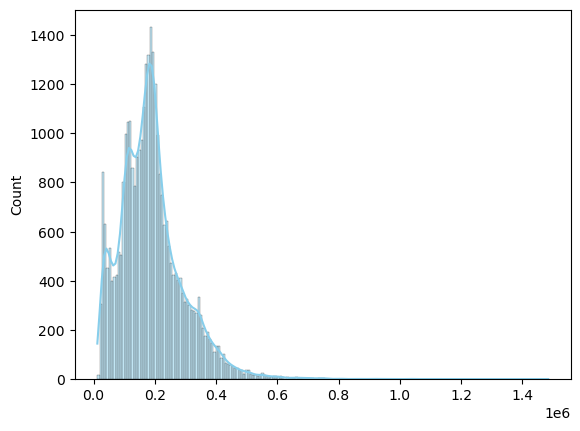

In [44]:
sns.histplot(population, kde=True, color='skyblue')

In [92]:
true_mean = population.mean()
print(true_mean)

189778.36651208502


We can see that the income is right skewed and is not normally distributed for the population

<Axes: ylabel='Count'>

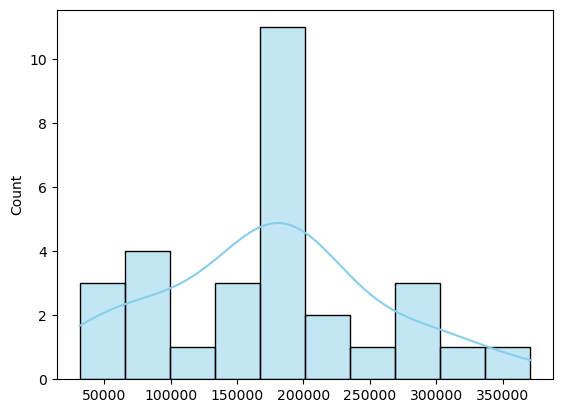

In [147]:
# Randomly select 30 values from the population as a sample
sample = np.random.choice(population, size=30, replace=False)
sns.histplot(sample, kde=True, color='skyblue', bins= 10)

We can also see that even with n>30, the sample distribution is not normally distributed

# Central Limit Theorem

1. Collect R samples size n
2. Calculate the mean of each sample
3. If n is large enough, the sampling distribution (distribution of the mean calculated in step 2) will be normally ditributed

In [109]:
def central_limit_theorem(population, num_values, Boostrap = False):
# Initialize an empty list to store means
    means = []


    # Number of loops
    num_loops = 1000

    # Number of values to select in each loop
    num_values = num_values

    for _ in range(num_loops):
        # Randomly select 5 values from the array
        random_selection = np.random.choice(population, size=num_values, replace=Boostrap)
        # Calculate the mean of the selected values
        mean = np.mean(random_selection)
        # Append the mean to the list
        means.append(mean)

    # Convert the list of means to a numpy array
    means = np.array(means)
    sampling_mean = means.mean()
    sampling_se = means.std()

    print(F"The estimated mean is {sampling_mean}") 
    print(F"The se is {sampling_se}") 

    # Plot the means using Seaborn
    plt.figure(figsize=(10, 6))
    sns.histplot(means, kde=True, color='skyblue')
    plt.title('Means of 5 Randomly Selected Values')
    plt.xlabel('Mean')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

The estimated mean is 190377.1706
The se is 50511.52613973385


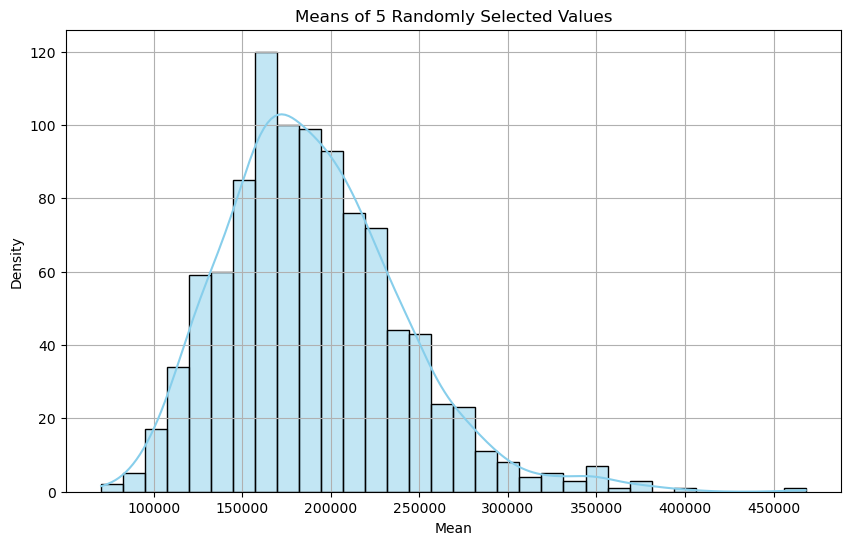

In [110]:
central_limit_theorem(population, 5)

The estimated mean is 189305.82145
The se is 23398.45607381302


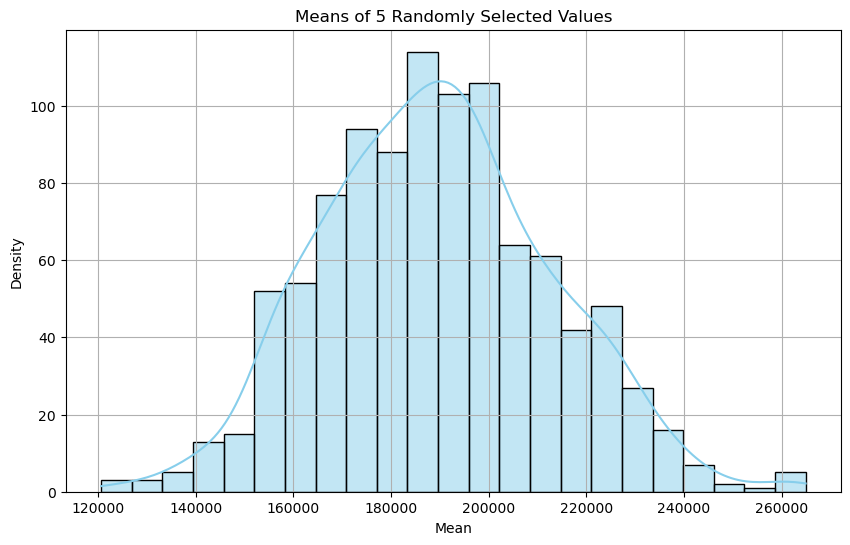

In [111]:
central_limit_theorem(population, 20)

The estimated mean is 188904.72793333334
The se is 18670.098141111743


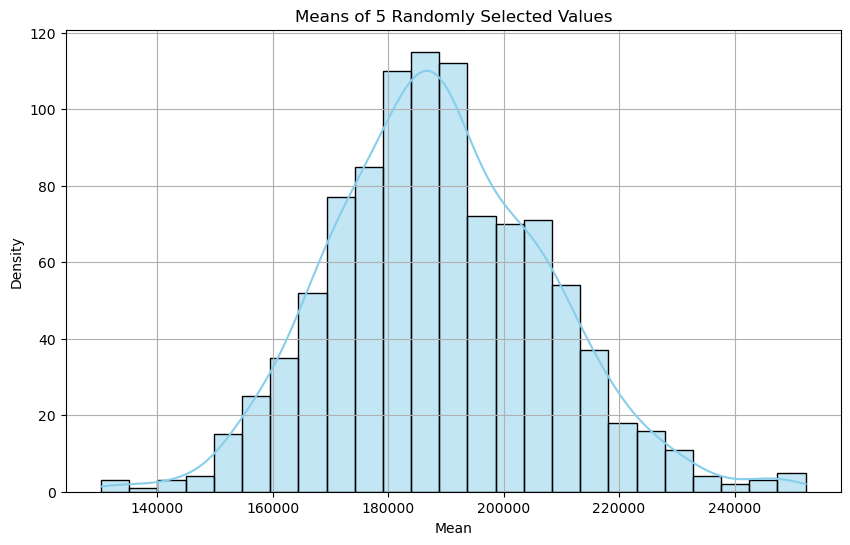

In [122]:
central_limit_theorem(population=population, num_values=30)

The estimated mean is 189797.707815
The se is 7098.266362544452


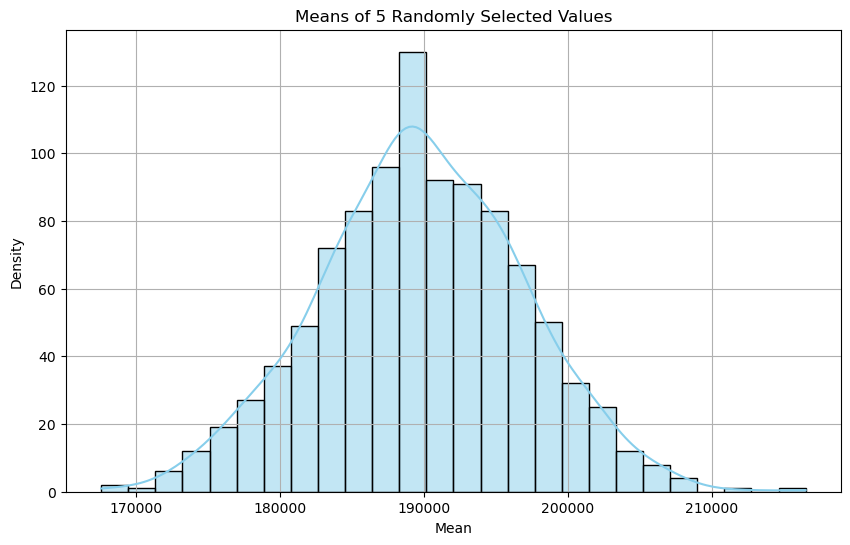

In [113]:
central_limit_theorem(population=population, num_values=200)

# Bootstrapping

Let say we have a sample n = 30, it will cost you more time and money to collect multiple samples to understand the sampling distribution. But we can estimate it using boostrapping and CLT
* Boostrapping: Resampling with replacement
* Resample the original sample (n=30) will get you infinity different samples, and we can estimate the sampling disitribution using these samples

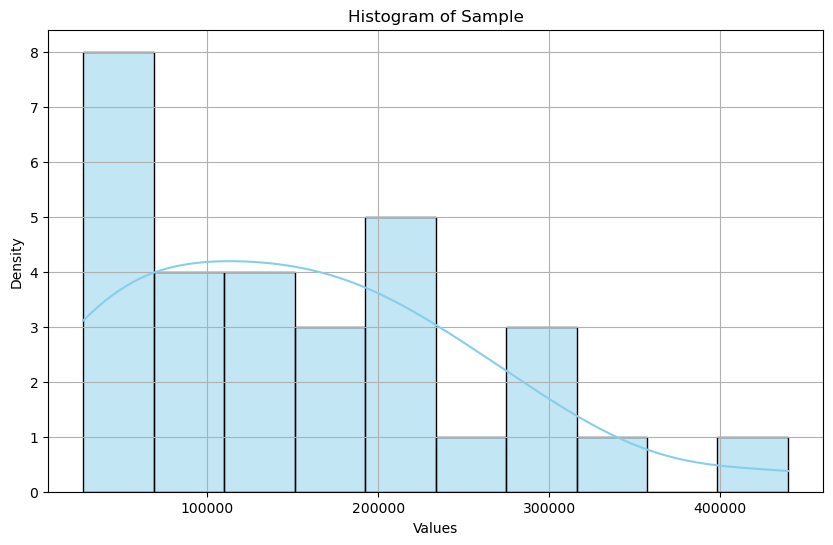

In [114]:
# Randomly select 5 values from the array
np.random.seed(42)  # Set seed before each random selection
sample = np.random.choice(population, size=30, replace=False)

# Plot the sample using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(sample, kde=True, color='skyblue', bins=10)
plt.title('Histogram of Sample')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [115]:
sample

array([280618, 439779, 204734, 107991,  54152, 240323, 279196,  48123,
       166481, 129042, 100651,  35854, 280570, 204160, 195949,  27433,
        91964,  30244,  48343, 231714, 152900,  98092, 181772,  38251,
       117983,  28791, 143910, 340476, 202570, 142717], dtype=int64)

In [121]:
sample.std()/np.sqrt(len(sample))

18516.49053431682

The estimated mean is 154721.40853333334
The se is 18835.940156111974


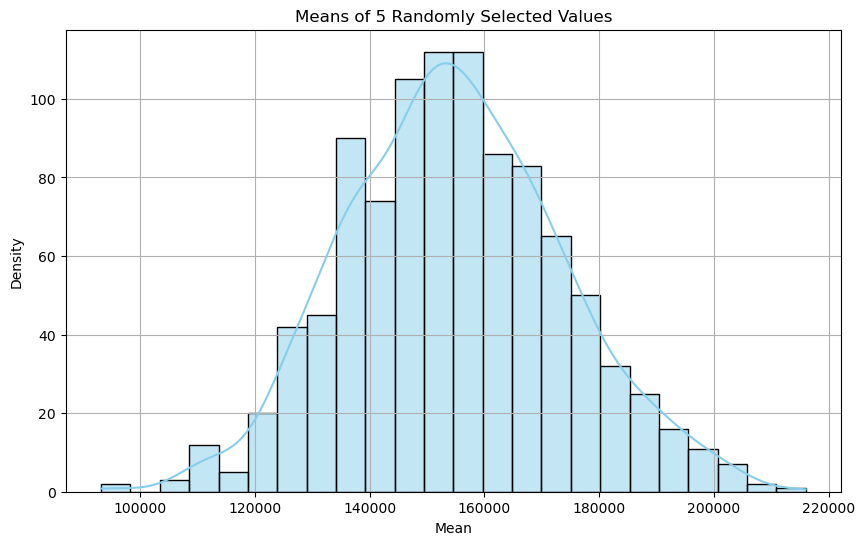

In [117]:
central_limit_theorem(sample, len(sample), True)

# Confidence Interval

## Using Definition
1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(1 – [x/100]) / 2]% of the R resample results from either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

In [125]:
# using code

In [123]:
sample

array([280618, 439779, 204734, 107991,  54152, 240323, 279196,  48123,
       166481, 129042, 100651,  35854, 280570, 204160, 195949,  27433,
        91964,  30244,  48343, 231714, 152900,  98092, 181772,  38251,
       117983,  28791, 143910, 340476, 202570, 142717], dtype=int64)

In [140]:
# Define the number of resamples (R)
R = 1000

# Define the confidence level
confidence_level = 95  # 95% confidence interval

# Define the size of each resample
n = len(sample)

# Initialize an array to store the statistics of interest for each resample
resample_statistics = np.zeros(R)

# Perform bootstrapping
for i in range(R):
    # Draw a random sample with replacement from the original data
    resample = np.random.choice(sample, size=n, replace=True)
    # Calculate the statistic of interest (mean in this case) for the resample
    resample_statistics[i] = np.mean(resample)

# Calculate the lower and upper bounds of the confidence interval
alpha = (100 - confidence_level) / 2
lower_bound = np.percentile(resample_statistics, alpha)
upper_bound = np.percentile(resample_statistics, 100 - alpha)

# Print the confidence interval
print(resample_statistics.mean())
print(f"Bootstrap {confidence_level}% confidence interval for the mean: [{lower_bound}, {upper_bound}]")

154534.97040000002
Bootstrap 95% confidence interval for the mean: [121253.30249999999, 191167.24833333332]


## Using Estimation formula

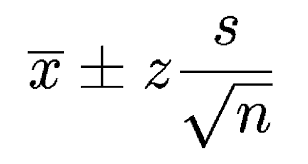

In [135]:
x_bar = sample.mean()
x_bar

154826.1

In [133]:
se = sample.std()/(np.sqrt(len(sample)))
se

18516.49053431682

In [146]:
upper_bound = (1.96*se)+x_bar
lower_bound = (-1.96*se) +x_bar

In [142]:
upper_bound

191118.42144726097

In [145]:
lower_bound

118533.77855273904